In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate


# 1. Loading the Dataset from CSV

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("heart_2022_cleaned.csv")
# Display sample data
df

,Sex,Age,Race,BMI,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,SleepHours,...,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
0,0,12,0,26.57,4,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
1,0,7,0,25.61,3,2,3,1,0,5,...,0,0,0,0,0,0,0,0,0,0
2,0,4,0,21.77,1,2,0,1,1,9,...,0,1,0,0,0,0,1,0,0,0
3,1,12,0,26.08,0,1,0,0,0,7,...,0,0,1,0,1,0,1,0,0,1
4,0,12,1,22.96,3,0,0,1,0,7,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318920,1,9,3,29.86,2,0,15,1,0,7,...,0,1,0,0,1,0,1,0,0,1
318921,1,2,0,31.19,2,0,0,1,0,8,...,0,1,0,0,0,0,1,0,0,0
318922,0,6,1,28.66,4,2,2,1,0,7,...,0,0,0,0,0,0,1,0,0,0
318923,1,10,1,32.55,3,0,0,0,1,5,...,0,0,1,0,0,1,1,0,0,0


# 5. Machine Learning

### 5.1. Linear Regression Model (Removed)


### 5.2. Supervised Learning - Random Forests

#### 5.2.1. Loading and Processing Data

In [3]:
# Copy dataset for Random Forests - Supervised Learning
df5 = df.copy()

In [12]:
# Define features set X
X = df5.drop("HeartAttack", axis=1)
# Define target vector y
y = df5["HeartAttack"].values

##### Using MinMaxScaler() and SMOTE to deal with Imbalanced Data

In [13]:
# Dealing with Imbalanced Data
# Scale features to [0, 1] range
X_scaled = MinMaxScaler().fit_transform(X)

# SMOTE for Resampling to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#### Split the Resampled data into Training, Validation and Test sets. The validation set is used for tuning hyperparameters and early stopping.

In [14]:
# Split the data into training, validation, and test using train_test_split with stratification
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, 
    y_resampled, 
    stratify=y_resampled,  # to maintain the same proportion of classes in both train and test sets
    test_size=0.3,
    random_state=78
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    stratify=y_temp,
    test_size=0.5,
    random_state=78
)

#### 5.2.2. Standardize the features using StandardScaler()

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler and Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

##### Random Forest classifier

In [16]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

##### Fit the model with early stopping
* Hyperparameter Tuning: GridSearchCV is used to find the best hyperparameters by evaluating the model with cross-validation on the training set.

In [ ]:
# Define a grid of hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
# Implement GridSearchCV with cross-validation and early stopping
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

In [8]:
# Fitting the model
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


python(17530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


KeyboardInterrupt: 

In [ ]:
# Print the best parameters and best cross-validation score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

#### 5.2.3. Making Prediction Using the Testing data

In [6]:
# Evaluate the best model on the validation set
best_rf_model = grid_search.best_estimator_
val_predictions = best_rf_model.predict(X_val_scaled)
val_acc_score = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy Score: {val_acc_score}")

Validation Accuracy Score: 0.9706492703711063


In [ ]:
# Making predictions using the testing data
test_predictions = best_rf_model.predict(X_test_scaled)

##### Calculate training loss, validation loss, test loss, training error, validation error, and general error

In [15]:
from sklearn.metrics import log_loss

# Predictions
y_train_pred = best_rf_model.predict(X_train_scaled)
y_val_pred = best_rf_model.predict(X_val_scaled)
y_test_pred = best_rf_model.predict(X_test_scaled)

# and Predict Probabilities
y_train_prob = best_rf_model.predict_proba(X_train_scaled)[:, 1]
y_val_prob = best_rf_model.predict_proba(X_val_scaled)[:, 1]
y_test_prob = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate losses
train_loss = log_loss(y_train, y_train_prob)
val_loss = log_loss(y_val, y_val_prob)
test_loss = log_loss(y_test, y_test_prob)

# Calculate errors
train_error = 1 - accuracy_score(y_train, y_train_pred)
val_error = 1 - accuracy_score(y_val, y_val_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

# Print losses and errors
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Training Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Test Error : {test_error:.4f}")

Training Loss: 0.0343
Validation Loss: 0.0970
Test Loss: 0.0962
Training Error: 0.0015
Validation Error: 0.0294
Test Error : 0.0287


#### 5.2.4. Model Evaluation

In [5]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, test_predictions)

# Displaying results
print("Confusion Matrix")
print(cm_df)
print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, test_predictions))

Confusion Matrix
          Predicted 0  Predicted 1
Actual 0        44087         1210
Actual 1         1388        43909
Accuracy Score: 0.9713226041459699
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     45297
           1       0.97      0.97      0.97     45297

    accuracy                           0.97     90594
   macro avg       0.97      0.97      0.97     90594
weighted avg       0.97      0.97      0.97     90594



#### 5.2.5. Feature Importance

In [10]:
# Random Forests in sklearn will automatically calculate feature importance
importances = best_rf_model.feature_importances_
# We can sort the features by their importance
sorted_importances = sorted(zip(importances, X.columns), reverse=True)

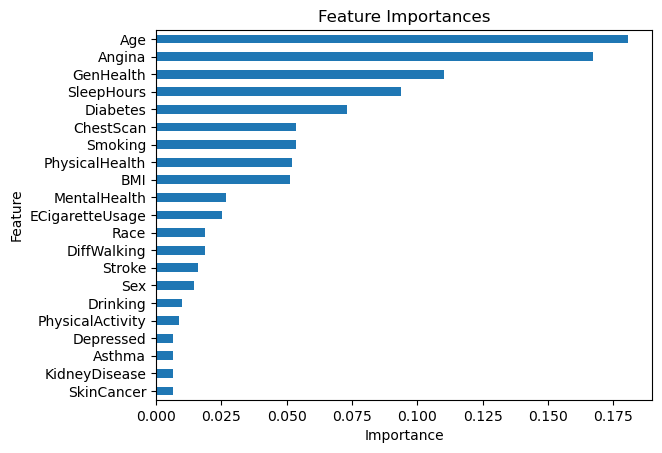

In [11]:
# Create a DataFrame for the importances
importances_df = pd.DataFrame(sorted_importances, columns=['Importance', 'Feature'])
importances_df.set_index('Feature', inplace=True)
importances_sorted = importances_df.sort_values(by='Importance')

# Plot the feature importances
importances_sorted.plot(kind='barh', title='Feature Importances', legend=False)
plt.xlabel('Importance')
plt.show()


#### 5.2.6. Receiver Operating Characteristic (ROC)

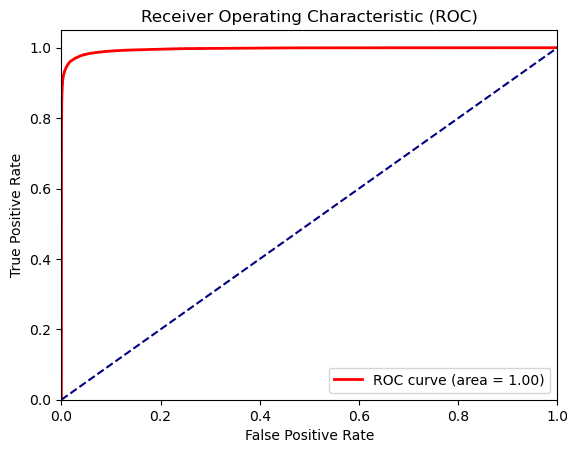

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve and AUC
y_pred_prob = best_rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()